In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

# Load Dataset

In [ ]:
# Membaca file CSV
df = pd.read_csv('/data/CarPrice_Assignment_cleaned.csv')


# Save Model

In [ ]:
# Menampilkan baris awal dataset
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Modeling

In [ ]:
# Split Data
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Modeling dengan Random Forest
model = LinearRegression()
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, max_features='sqrt', random_state=42)

# Evaluation

In [ ]:
# Evaluasi Model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

MAE: 21703918.00
MSE: 1300110077089184.50
RMSE: 36057039.22
R2 Score: 0.9381


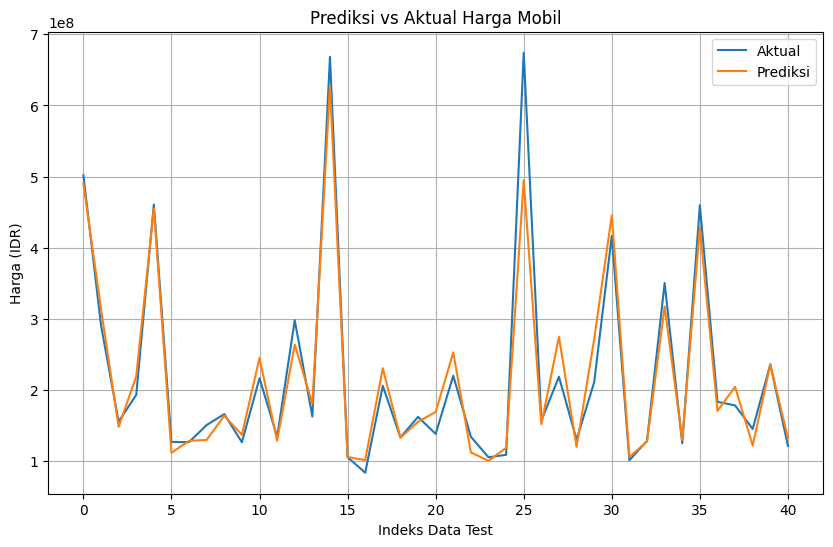

In [ ]:
# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Aktual')
plt.plot(y_pred, label='Prediksi')
plt.title('Prediksi vs Aktual Harga Mobil')
plt.xlabel('Indeks Data Test')
plt.ylabel('Harga (IDR)')
plt.legend()
plt.grid(True)
plt.show()

# Inference

In [ ]:
# Inference (Predict new data)
new_data = pd.DataFrame({
    'fueltype': [0],
    'aspiration': [0],
    'doornumber': [0],
    'carbody': [0],
    'drivewheel': [0],
    'enginelocation': [0],
    'wheelbase': [88.6],
    'carlength': [168.8],
    'carwidth': [64.1],
    'carheight': [48.8],
    'curbweight': [2548],
    'enginetype': [0],
    'cylindernumber': [0],
    'enginesize': [130],
    'fuelsystem': [0],
    'boreratio': [3.47],
    'stroke': [2.68],
    'compressionratio': [9.0],
    'horsepower': [111],
    'peakrpm': [5000],
    'citympg': [21],
    'highwaympg': [27],
    'brand': [0]
})

predicted_price = model.predict(new_data)

print(f"Prediksi harga mobil baru: Rp {predicted_price[0]:,.2f}")

Prediksi harga mobil baru: Rp 233,624,664.19


# Save Model

In [ ]:
# Save model ke .pkl
pickle.dump(model, open('../model/lr_model.pkl', 'wb'))